In [1]:
import pandas as pd
import numpy as np

In [7]:
db=pd.read_csv('Database/high_diamond_ranked_10min.csv')

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
db.sample(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9773,4527198639,0,16,1,1,4,9,2,0,0,...,0,16259,6.6,17549,184,33,974,815,18.4,1625.9
2665,4429490822,1,17,4,0,11,9,12,1,1,...,0,17446,7.0,18328,218,54,-1139,-1170,21.8,1744.6
7189,4500029436,1,14,2,1,9,3,12,0,0,...,1,15485,6.6,16764,193,50,-3653,-1553,19.3,1548.5
5726,4521775433,1,45,2,0,5,8,6,0,0,...,0,17237,7.0,17442,187,60,301,-71,18.7,1723.7
9177,4511313757,0,13,0,0,4,13,4,0,0,...,0,19665,7.4,19898,208,47,4686,2937,20.8,1966.5


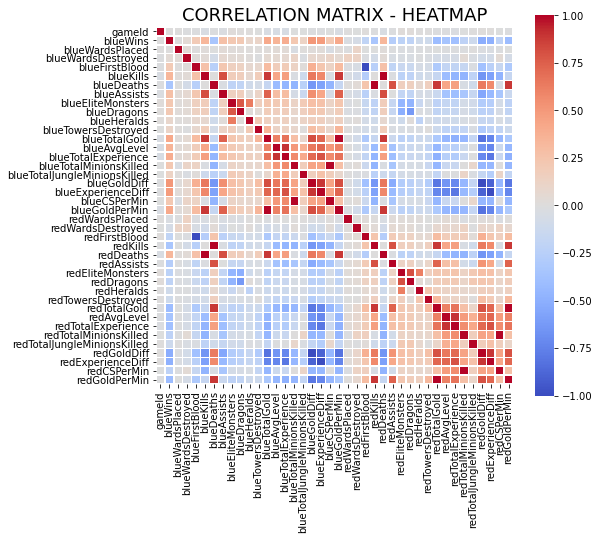

In [11]:
corr = db.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def feature_selection(X,y,model,cv,rang):
    sfs = SFS(model, 
          k_features=rang, 
          forward=True, 
          floating=True, 
          scoring='roc_auc',
          cv=cv,
          verbose=1,
          n_jobs=-1)
    pipe = make_pipeline(StandardScaler(), sfs)
    pipe.fit(X, y)
    return sfs

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=1, store_covariance=True,tol=0.1)
wrapperMLP=feature_selection(X,y,model,5,39)
df_wrapper=pd.DataFrame.from_dict(wrapperMLP.get_metric_dict()).T
df_wrapper.sort_values(['avg_score'], ascending=[False]) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.0s finished
Features: 1/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s fini

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
Features: 11/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using bac

[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished
Features: 15/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 16/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.6s finished
Features: 22/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.8s finished
Features: 23/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.9s finished
[P

[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.4s finished
Features: 29/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.6s finished
Features: 30/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.7s finished
Features: 31/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.7s finished
Fe

Features: 30/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
Features: 31/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.3s finished
Features: 32/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.5s finished
Features: 33/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 co

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
17,"(4, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 26, 2...","[0.8159761919396809, 0.8041387505890548, 0.803...",0.810761,"(4, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 26, 2...",0.0118602,0.00922768,0.00461384
19,"(3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20, 26...","[0.8163255270760342, 0.8039123486385149, 0.803...",0.810757,"(3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20, 26...",0.011723,0.00912091,0.00456045
20,"(3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20, 21...","[0.8161308828651627, 0.803931813059602, 0.8038...",0.810756,"(3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20, 21...",0.0117836,0.00916801,0.004584
18,"(0, 4, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 26...","[0.8159444342000124, 0.8041397750322699, 0.803...",0.810752,"(0, 4, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 26...",0.0118457,0.00921633,0.00460817
21,"(1, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20,...","[0.8161278095355174, 0.8039164464113755, 0.803...",0.810744,"(1, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, 20,...",0.011777,0.0091629,0.00458145
22,"(0, 1, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, ...","[0.8161226873194418, 0.8039102997520846, 0.803...",0.810727,"(0, 1, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 19, ...",0.0117654,0.0091539,0.00457695
23,"(0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 1...","[0.815713934476612, 0.8040178662896715, 0.8037...",0.810687,"(0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 1...",0.0116966,0.00910036,0.00455018
15,"(5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 27, 28, ...","[0.8159905341446924, 0.803930788616387, 0.8033...",0.810686,"(5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 27, 28, ...",0.0110666,0.00861016,0.00430508
16,"(0, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 27, 2...","[0.8159598008482389, 0.8039123486385149, 0.803...",0.810671,"(0, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 27, 2...",0.0110539,0.0086003,0.00430015
24,"(0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 1...","[0.8157262277951932, 0.8047349765402503, 0.803...",0.810652,"(0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 15, 16, 17, 1...",0.0117587,0.00914869,0.00457435


In [38]:
df_wrapper.sort_values(['avg_score'], ascending=[False]).iloc[0]['feature_idx']

(4, 5, 7, 8, 11, 15, 16, 17, 19, 20, 21, 26, 27, 30, 35, 36, 38)

In [41]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='logistic', alpha=0.001, early_stopping=True,
                      hidden_layer_sizes=100, max_iter=100)
wrapperMLP=feature_selection(X,y,model,2,39)
df_wrapper=pd.DataFrame.from_dict(wrapperMLP.get_metric_dict()).T
df_wrapper.sort_values(['avg_score'], ascending=[False]) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    8.1s finished
Features: 1/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
Features: 2/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s finished
Features: 3/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    5.4s finished
Features: 18/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    6.6s finished
Features: 19/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    5.7s finished
Features: 20/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished
Fe

[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    8.8s finished
Features: 32/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    9.5s finished
Features: 33/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parall

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(7, 9, 16, 20, 27, 35, 36, 37)","[0.8099754543405658, 0.8117712649690658]",0.810873,"(7, 9, 16, 20, 27, 35, 36, 37)",0.00386337,0.000897905,0.000897905
7,"(7, 9, 16, 27, 35, 36, 37)","[0.8100015161759584, 0.8116909161568344]",0.810846,"(7, 9, 16, 27, 35, 36, 37)",0.00363445,0.0008447,0.0008447
12,"(7, 9, 14, 16, 18, 20, 21, 26, 27, 35, 36, 37)","[0.8098454729854325, 0.8116500858420473]",0.810748,"(7, 9, 14, 16, 18, 20, 21, 26, 27, 35, 36, 37)",0.00388231,0.000902306,0.000902306
10,"(0, 7, 9, 14, 16, 20, 27, 35, 36, 37)","[0.8101564119900834, 0.8112649034748403]",0.810711,"(0, 7, 9, 14, 16, 20, 27, 35, 36, 37)",0.00238473,0.000554246,0.000554246
9,"(0, 7, 9, 16, 20, 27, 35, 36, 37)","[0.8101226463417133, 0.8112453901918696]",0.810684,"(0, 7, 9, 16, 20, 27, 35, 36, 37)",0.00241539,0.000561372,0.000561372
18,"(1, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 22, 2...","[0.8102534472514188, 0.8110745259830021]",0.810664,"(1, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 22, 2...",0.00176641,0.000410539,0.000410539
11,"(7, 9, 14, 16, 18, 20, 21, 27, 35, 36, 37)","[0.8095255188804884, 0.8116625481068016]",0.810594,"(7, 9, 14, 16, 18, 20, 21, 27, 35, 36, 37)",0.00459745,0.00106851,0.00106851
13,"(7, 9, 14, 15, 16, 18, 20, 21, 26, 27, 35, 36,...","[0.8095381400208986, 0.8114905360577593]",0.810514,"(7, 9, 14, 15, 16, 18, 20, 21, 26, 27, 35, 36,...",0.00420024,0.000976198,0.000976198
17,"(1, 7, 8, 9, 14, 16, 17, 18, 20, 21, 22, 26, 2...","[0.8097386030692318, 0.8112463740548768]",0.810492,"(1, 7, 8, 9, 14, 16, 17, 18, 20, 21, 22, 26, 2...",0.00324371,0.000753885,0.000753885
14,"(5, 7, 9, 14, 15, 16, 18, 20, 21, 26, 27, 35, ...","[0.8092414612658021, 0.8117035423987563]",0.810473,"(5, 7, 9, 14, 15, 16, 18, 20, 21, 26, 27, 35, ...",0.00529674,0.00123104,0.00123104


In [42]:
df_wrapper.sort_values(['avg_score'], ascending=[False]).iloc[0]['feature_idx']

(7, 9, 16, 20, 27, 35, 36, 37)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(criterion="friedman_mse",
                       max_features=4, n_estimators=20)
wrapperMLP=feature_selection(X,y,model,5,39)
df_wrapper=pd.DataFrame.from_dict(wrapperMLP.get_metric_dict()).T
df_wrapper.sort_values(['avg_score'], ascending=[False]) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  39 | elapsed:    1.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:612: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 1/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:642: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 2/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.0s finished
Features: 21/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished
Features: 21/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.9s finished
Features: 22/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    4.0s finished
[P

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished
Features: 31/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    7.4s finished
Features: 32/39[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    7.2s finished
Features: 33/39[P

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(1, 2, 3, 8, 15, 17, 18, 20, 27, 35)","[0.8150290941873092, 0.8036531645050915, 0.801...",0.808813,"(1, 2, 3, 8, 15, 17, 18, 20, 27, 35)",0.0118569,0.00922511,0.00461255
8,"(1, 2, 4, 8, 17, 18, 27, 35)","[0.8147325178765341, 0.8021595262974572, 0.800...",0.808808,"(1, 2, 4, 8, 17, 18, 27, 35)",0.0124019,0.0096491,0.00482455
7,"(1, 2, 8, 17, 18, 27, 35)","[0.814722273444383, 0.8012856762349663, 0.8010...",0.808764,"(1, 2, 8, 17, 18, 27, 35)",0.0122547,0.00953459,0.00476729
24,"(1, 2, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18...","[0.8159787530477187, 0.8021226463417133, 0.800...",0.80874,"(1, 2, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18...",0.011627,0.00904624,0.00452312
16,"(1, 2, 3, 5, 6, 8, 14, 15, 16, 17, 18, 27, 28,...","[0.8143212039256664, 0.8012452107279693, 0.800...",0.80873,"(1, 2, 3, 5, 6, 8, 14, 15, 16, 17, 18, 27, 28,...",0.0132815,0.0103335,0.00516673
15,"(1, 2, 3, 5, 6, 8, 14, 15, 16, 17, 18, 27, 28,...","[0.8140046509721965, 0.8028679287807077, 0.800...",0.808714,"(1, 2, 3, 5, 6, 8, 14, 15, 16, 17, 18, 27, 28,...",0.0119584,0.00930401,0.00465201
11,"(1, 2, 3, 8, 15, 17, 18, 20, 27, 35, 37)","[0.8149835064642367, 0.8044660601962833, 0.800...",0.808671,"(1, 2, 3, 8, 15, 17, 18, 20, 27, 35, 37)",0.0119179,0.00927254,0.00463627
13,"(1, 2, 3, 5, 6, 8, 15, 16, 17, 18, 27, 35, 37)","[0.8142751039809863, 0.8014065605343494, 0.800...",0.80865,"(1, 2, 3, 5, 6, 8, 15, 16, 17, 18, 27, 35, 37)",0.0125437,0.00975944,0.00487972
14,"(1, 2, 3, 5, 6, 8, 15, 16, 17, 18, 27, 28, 35,...","[0.814512262585285, 0.8012288196365275, 0.8017...",0.80863,"(1, 2, 3, 5, 6, 8, 15, 16, 17, 18, 27, 28, 35,...",0.0120399,0.00936746,0.00468373
6,"(1, 2, 8, 17, 27, 35)","[0.813321859569324, 0.8016980146290491, 0.8015...",0.80862,"(1, 2, 8, 17, 27, 35)",0.0118027,0.00918291,0.00459146
